# AB тест акции в SkyCrossroads

В компании SkyCrossroads есть рекламная акция, в соответствии с которой клиенту дается возможность получить дополнительные баллы лояльности за покупку, совершенную в течение ограниченного периода времени после запуска акции. 

Классическая акция подразумевает получение дополнительные 1000 баллов лояльности за покупку от 100 рублей. Было решено запустить АБ Тест, в котором в тестовой группе предлагается в два раза больше баллов лояльности за покупку от 100 рублей. 

Эксперимент был проведен в нескольких торговых точках, которые в датасете представлены столбцом id_point.  Также в датасете есть информация о том, как долго клиент уже зарегистрирован у нас в программе лояльности.

Отдел маркетинга попросил нас рассчитать результаты этого эксперимента (в целом и в отдельности по каждой точке) и вынести решение об эффективности воздействия Б по сравнению с воздействием А. Также необходимо провести сегментацию пользователей с точки зрения длительности регистрации.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Dataset_AB_TEST.csv', sep = ';')
df

,id_client,id_group,sum_pay,id_point,months_reg
0,1420218,test,3288.0,1199.0,8
1,1390221,control,1267.0,1182.0,11
2,1363404,control,4259.0,1178.0,2
3,1370042,test,7211.0,1179.0,3
4,1360376,control,760.0,1178.0,14
...,...,...,...,...,...
10971,1359021,control,799.0,1178.0,3
10972,1363347,control,4825.0,1178.0,6
10973,1373031,test,673.0,1179.0,1
10974,1370292,test,1120.0,1179.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10976 entries, 0 to 10975
Data columns (total 5 columns):
id_client     10976 non-null int64
id_group      10902 non-null object
sum_pay       10849 non-null float64
id_point      10895 non-null float64
months_reg    10976 non-null int64
dtypes: float64(2), int64(2), object(1)
memory usage: 428.9+ KB


In [4]:
df = df.dropna()

In [5]:
import numpy as np
import seaborn as sns

In [6]:
#Проверяем есть ли выбросы
def statistical_analysis(s, q = [0.1,0.25,0.3,0.4,0.5,0.6,0.75,0.9]):
    
    if type(s) is not tuple and type(s) is not list:
        print('Передан параметр неверного типа!')
        return
    if len(s)<= 4:
        print('Ряд недостаточно длинный!')
        return
    s = pd.Series(s)
    avg_s = s.mean()
    var_s =  s.var()
    std_s = s.std()
    print('Среднее значение:', avg_s)
    print('Дисперсия:',  var_s)
    print('Стандартное отклонение:', std_s)
    
    qs = np.quantile(s, q)
    for i in range(len(q)):
        if q[i] == 0.5:
            print('Медиана:', qs[i])
        elif q[i] == 0.25:
            print('Первый квартиль:', qs[i])
        elif q[i] == 0.75:
            print('Третий квартиль:', qs[i])
        else: 
            print('Дециль:', qs[i])
            
    sns.histplot(s)  
        
    return avg_s, var_s , std_s, qs

Среднее значение: 3568.7580258302582
Дисперсия: 8568932.941996625
Стандартное отклонение: 2927.27397795229
Дециль: 410.0
Первый квартиль: 1250.75
Дециль: 1590.0
Дециль: 2329.6000000000004
Медиана: 3173.5
Дециль: 3934.0
Третий квартиль: 5356.5
Дециль: 7088.200000000001


(3568.7580258302582,
 8568932.941996625,
 2927.27397795229,
 array([ 410.  , 1250.75, 1590.  , 2329.6 , 3173.5 , 3934.  , 5356.5 ,
        7088.2 ]))

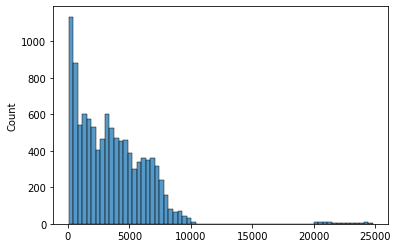

In [7]:
statistical_analysis(list(df.sum_pay))

Видим, что выбросы пристуствуют

In [ ]:
#избавимся от выбросов (покупки более 12 тысяч)
df_clean = df.loc[df.sum_pay < 12000]

Среднее значение: 3431.3779388532666
Дисперсия: 6023895.900736336
Стандартное отклонение: 2454.3626261692334
Дециль: 409.0
Первый квартиль: 1237.0
Дециль: 1576.0
Дециль: 2307.0
Медиана: 3155.0
Дециль: 3899.0
Третий квартиль: 5274.0
Дециль: 7011.0


(3431.3779388532666,
 6023895.900736336,
 2454.3626261692334,
 array([ 409., 1237., 1576., 2307., 3155., 3899., 5274., 7011.]))

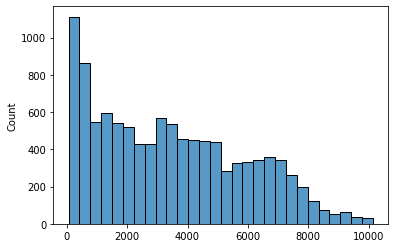

In [9]:
statistical_analysis(list(df_clean.sum_pay))

In [10]:
df_clean.head()

,id_client,id_group,sum_pay,id_point,months_reg
0,1420218,test,3288.0,1199.0,8
1,1390221,control,1267.0,1182.0,11
2,1363404,control,4259.0,1178.0,2
3,1370042,test,7211.0,1179.0,3
4,1360376,control,760.0,1178.0,14


In [13]:
import matplotlib.pyplot as plt

In [14]:
#Строим гистограммы для сравнения групп
def show_hist(a, b):
    sns.histplot(a)
    sns.histplot(b, color = 'red')
    plt.show()

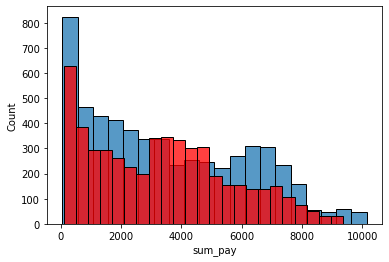

In [15]:
test = df_clean.loc[df_clean.id_group == 'test']
control = df_clean.loc[df_clean.id_group == 'control']
show_hist(test['sum_pay'], control['sum_pay'])

Видим, что сумма оплат больше в тестовой группе.

In [16]:
#проводим непараметрические и параметрические тесты
def mann_whitney_func(a, b, alpha = 0.05):
    res, p = stats.mannwhitneyu(a, b, alternative = 'two-sided')
    
    if p < alpha:
        print('Распределения не равны')
    else:
        print('Распределения равны')
    
    return res, p

In [17]:
from scipy import stats

In [18]:
def test_calc(a, b, alpha = 0.05):
    s, p = stats.ttest_ind(a, b)
    if alpha < p: 
        print('Гипотеза Н0 о равенстве средних принимается')
    else:
        print('Гипотеза Н0 о равенстве средних отвергается')
    return s, p


In [19]:
mann_whitney_func(test['sum_pay'], control['sum_pay'])

Распределения равны


(14750609.5, 0.058421258797022896)

Мы не видим существенную разницу между тестовой и контрольной группой

In [20]:
test_calc(test['sum_pay'], control['sum_pay'])

Гипотеза Н0 о равенстве средних отвергается


(3.7141912292177888, 0.0002048855494553075)

В данном случае мы видим существенную разницу.

In [21]:
#Анализ по торговым точкам
uniq_p = df_clean.id_point.unique()


 Точка:  1199.0


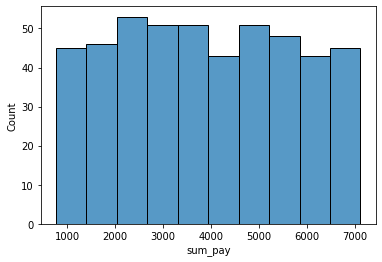

Недостаточно значений

 Точка:  1182.0


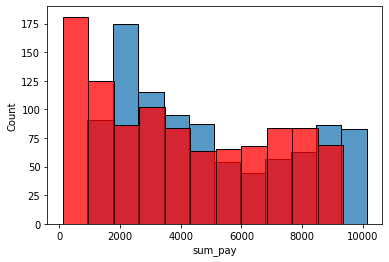

Тест Манна-Уитни: 
Распределения не равны
Тест Стьюдента: 
Гипотеза Н0 о равенстве средних отвергается

 Точка:  1178.0


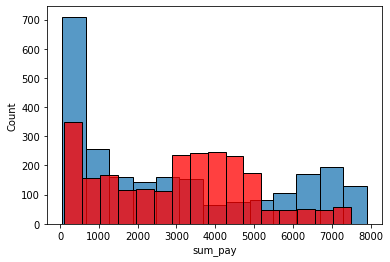

Тест Манна-Уитни: 
Распределения не равны
Тест Стьюдента: 
Гипотеза Н0 о равенстве средних принимается

 Точка:  1179.0


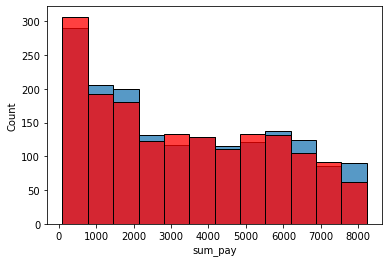

Тест Манна-Уитни: 
Распределения равны
Тест Стьюдента: 
Гипотеза Н0 о равенстве средних принимается

 Точка:  1186.0


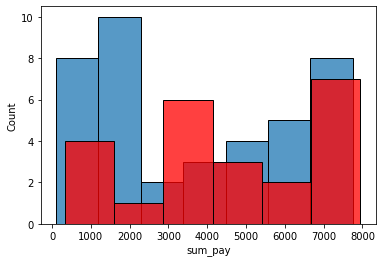

Недостаточно значений

 Точка:  1188.0


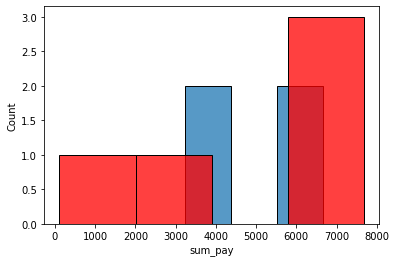

Недостаточно значений


In [27]:
for i in uniq_p:
    test = df_clean.loc[(df_clean.id_group == 'test') & (df_clean.id_point == i)]
    test = test['sum_pay']
    control = df_clean.loc[(df_clean.id_group == 'control') & (df_clean.id_point == i)]
    control = control['sum_pay']
    print("\n Точка: ", i)
    show_hist(test, control)
    
    if len(test) > 100 and len(control) > 100:
        print("Тест Манна-Уитни: ")
        mann_whitney_func(test, control)
        print("Тест Стьюдента: ")
        test_calc(test, control)
    else: 
        print("Недостаточно значений")

Мы видим, что для первой точки нет вообще контрольной группы, а для последних двух недостаточно данных.

In [36]:
def proxi_ranges(a, b, alpha = 0.05):
    var1 = a.var()
    var2 = b.var()
    cov = np.cov(a, b)
    print('Дисперсия первого ряда:', var1)
    print('Дисперсия второго ряда:',  var2)
    print('Ковариация:', cov)
    
    pcoef, p1 = stats.pearsonr(a, b)
    scoef, p2 = stats.spearmanr(a, b) 
    if p1 > alpha:
        print('Корелляция Пирсона равна нулю')
    elif (pcoef < 0.3): 
        print('Корелляция слабая, коэффициент Пирсона: ', pcoef)    
    elif pcoef >0.7: 
        print('Корелляция сильная, коэффициент Пирсона: ', pcoef)
    else:
        print('Корелляция средняя, коэффициент Пирсона: ', pcoef)
   
    if p2 > alpha:
        print('Корелляция Спирмана равна нулю')
    elif (scoef < 0.3): 
        print('Корелляция слабая, коэффициент Спирмана: ', scoef)
    elif  scoef >0.7: 
        print('Корелляция сильная, коэффициент Спирмана: ', scoef)
    else:
        print('Корелляция средняя, коэффициент Спирмана: ', scoef)
    
    

In [37]:
proxi_ranges(df_clean['sum_pay'], df_clean['months_reg'] )

Дисперсия первого ряда: 6023895.900736336
Дисперсия второго ряда: 10.039582493439365
Ковариация: [[6.02389590e+06 4.65262789e+03]
 [4.65262789e+03 1.00395825e+01]]
Корелляция средняя, коэффициент Пирсона:  0.598276252133036
Корелляция средняя, коэффициент Спирмана:  0.6520008575703581


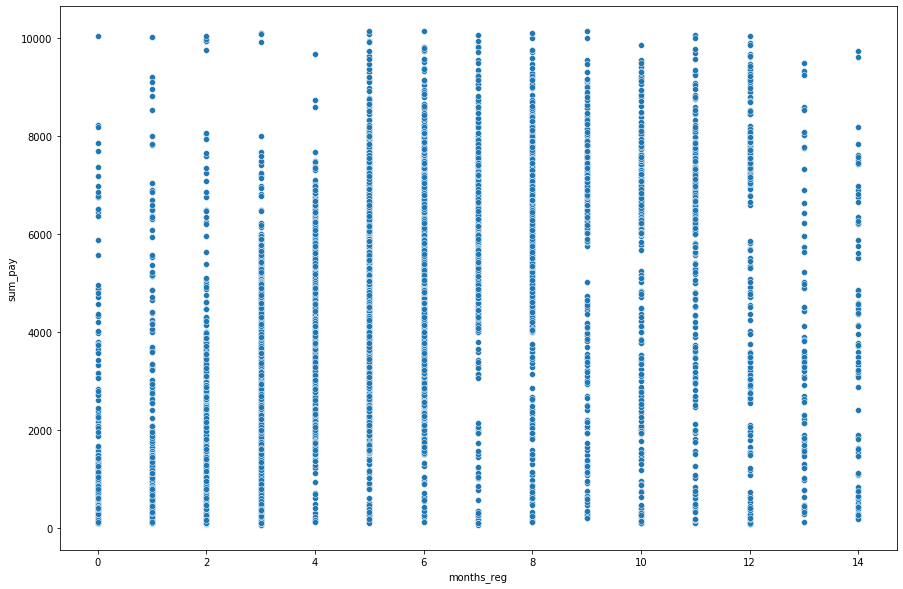

In [40]:
plt.figure(figsize = (15, 10))
sns.scatterplot( x = df_clean['months_reg'], y = df_clean['sum_pay'])

Видим, что есть определённая зависимость между суммой и длительностью регистрации. 

# Выводы: 

- В целом эксперимент можно считать успешным, новые условия акции в среднем подняли уровень суммы оплат


- Наиболее успешными оказались точки 1182.0 и 1178.0 


- Необходимо дополнить данные по точкам 1199.0, 1186.0 и 1188.0 


- Длительность регистрации влияет на сумму оплат клиента 